In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'1.15.0'

In [1]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 45.6MB/s 
     |████████████████████████████████| 3.8MB 33.9MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
#@title Load all required Library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
tf.__version__

'2.1.0'

In [0]:
dataset = tf.keras.datasets.fashion_mnist

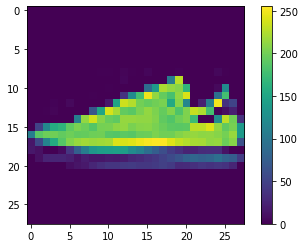

In [76]:
#@title Load mnist_fashion dataset
(train_x,train_y), (test_x,test_y) = dataset.load_data()

plt.figure()
plt.imshow(train_x[6])
plt.colorbar()
plt.grid(False)
plt.show()

output = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandel', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

In [0]:
train_x, test_x = train_x/255, test_x/255

In [0]:
#@title Set neural network
network = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
#@title Set Optimizer and loss function
network.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [61]:
network.fit(train_x, train_y, epochs=5, batch_size=500)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.7097 - accuracy: 0.7521
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4684 - accuracy: 0.8301
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4002 - accuracy: 0.8534
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3641 - accuracy: 0.8673
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3388 - accuracy: 0.8737


In [62]:
network.evaluate(test_x, test_y)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.3524 - accuracy: 0.8736


[0.3523882199048996, 0.8736]

In [63]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  401920    
_________________________________________________________________
dense_8 (Dense)              multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
predictions = network.predict(test_x)

predicted:  Sneaker


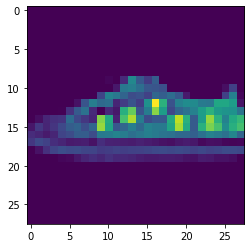

In [102]:
#@title Prediction
plt.imshow(test_x[4550])
c = 0
for i in predictions[4550]:
  if int(i) == 1:
    break
  c += 1
print('predicted: ',output[c])    